# IRIS PROJECT

### DATA LOADING




In [2]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
count_species = df['species'].value_counts()

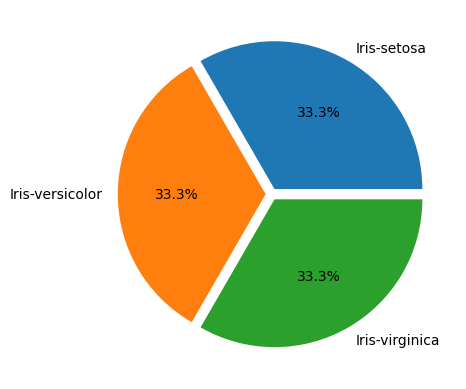

In [6]:
import matplotlib.pyplot as plt

plt.pie(count_species, labels= df['species'].unique(), autopct='%0.1f%%', explode=(.04,.04,.04))
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

# Start Modeling


In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True)


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_gridd = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

SVC = GridSearchCV(SVC(),param_gridd, verbose=1)


In [17]:
SVC.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [19]:
predictions = SVC.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(predictions, y_test)

0.9777777777777777

<Axes: >

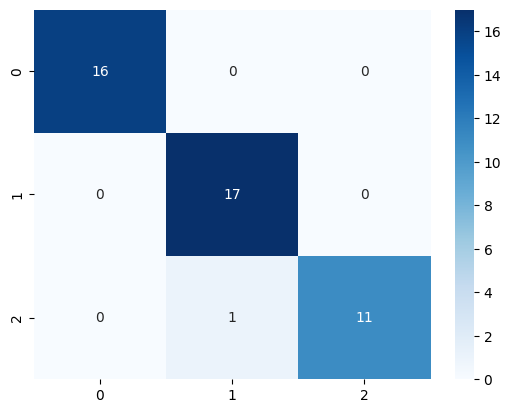

In [26]:
import seaborn as sns

cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, cmap="Blues")

In [33]:
result = SVC.predict([[7.3,2.9,6.3,1.8]])
result

C:\Users\zeyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [35]:
decode_labels = le.inverse_transform(result)
decode_labels

array(['Iris-virginica'], dtype=object)


# File Makling 


In [36]:
import pickle

with open('Iris_model.pkl', 'wb') as file:
    pickle.dump(SVC, file)

In [37]:
import pickle

with open('Iris_model.pkl', 'rb') as file:
    loaded = pickle.load(file)

In [40]:
result = loaded.predict([[7.3,2.9,6.3,1.8]])
result[0]

C:\Users\zeyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


2